In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions23 import *

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [2]:
# surf=xr.open_dataset(paths['mask'],decode_times=False).coast_mask[0,1,:,:]
# fig,ax=plt.subplots(1,1,figsize=(5,10))
# ax.contour(surf)
# ax.set_aspect(1/np.sin(np.deg2rad(49)))

In [3]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
config4='/home/jvalenti/MOAD/analysis-jose/OParcels/SalishSea_season4.yaml'
config3='/home/jvalenti/MOAD/analysis-jose/OParcels/SalishSea_season3.yaml'
config2='/home/jvalenti/MOAD/analysis-jose/OParcels/SalishSea_season2.yaml'
config1='/home/jvalenti/MOAD/analysis-jose/OParcels/SalishSea_Population2.yaml'

In [4]:
param = load_config1(config1)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile1 = os.path.join(paths['out'], fn)

param = load_config1(config2)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile2 = os.path.join(paths['out'], fn)

param = load_config1(config3)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile3 = os.path.join(paths['out'], fn)

param = load_config1(config4)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
name = param['file']['name'] #name output file
daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile4 = os.path.join(paths['out'], fn)

In [5]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])
ds1 = xr.open_dataset(outfile1)
ds2 = xr.open_dataset(outfile2)
ds3 = xr.open_dataset(outfile3)
ds4 = xr.open_dataset(outfile4)

In [6]:
DS=ds1.to_dataframe()

DSsed=DS[DS.beached==3.0]
DSbe=DS[DS.beached==1.0]
DScol=DS[DS.beached==0.0]

# Sedlon=np.array(DSsed.iloc[:,0])#.sort_values(by='time')
# Seddepth=np.array(DSsed.iloc[:,2])#.sort_values(by='time')
# Sedlat=np.array(DSsed.iloc[:,1])#.sort_values(by='time')

# Belon=np.array(DSbe.iloc[:,0])#.sort_values(by='time')
# Belat=np.array(DSbe.iloc[:,1])#.sort_values(by='time')

Collon1=np.array(DScol.iloc[:,0])#.sort_values(by='time')
Collat1=np.array(DScol.iloc[:,1])#.sort_values(by='time')

DS=ds2.to_dataframe()

DSsed=DS[DS.beached==3.0]
DSbe=DS[DS.beached==1.0]
DScol=DS[DS.beached==0.0]

Collon2=np.array(DScol.iloc[:,0])#.sort_values(by='time')
Collat2=np.array(DScol.iloc[:,1])#.sort_values(by='time')

DS=ds3.to_dataframe()

DSsed=DS[DS.beached==3.0]
DSbe=DS[DS.beached==1.0]
DScol=DS[DS.beached==0.0]

Collon3=np.array(DScol.iloc[:,0])#.sort_values(by='time')
Collat3=np.array(DScol.iloc[:,1])#.sort_values(by='time')

DS=ds4.to_dataframe()

DSsed=DS[DS.beached==3.0]
DSbe=DS[DS.beached==1.0]
DScol=DS[DS.beached==0.0]

Collon4=np.array(DScol.iloc[:,0])#.sort_values(by='time')
Collat4=np.array(DScol.iloc[:,1])#.sort_values(by='time')

In [7]:
# def distancia(lat2,lon2):
#     R = 6371e3
#     la1 = float(outf_lat) * math.pi/180
#     la2 = lat2 * math.pi/180
#     deltlat = (lat2-float(outf_lat)) * math.pi/180
#     deltlon = (lon2-float(outf_lon)) * math.pi/180
#     a = np.sin(deltlat/2) * np.sin(deltlat/2) + np.cos(la1) * np.cos(la2) * np.sin(deltlon/2) * np.sin(deltlon/2)
#     c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
#     return R * c 
# dcol = distancia(Collat,Collon)
# dsink = distancia(Sedlat,Sedlon)
# dbeach = distancia(Belat,Belon)

In [8]:
# fig,axs=plt.subplots(1,3,figsize=(10,4))
# axs[0].hist(dsink/1e3, bins = 15)
# axs[0].set_xlabel('Distance from outfall [km]')
# axs[0].set_ylabel('Number of particles')
# axs[0].set_title('Particles in the sediment')

# axs[1].hist(dcol/1e3, bins = 15)
# axs[1].set_xlabel('Distance from outfall [km]')
# axs[1].set_ylabel('Number of particles')
# axs[1].set_title('Particles in the watercolumn')

# axs[2].hist(dbeach/1e3, bins = 15)
# axs[2].set_xlabel('Distance from outfall [km]')
# axs[2].set_ylabel('Number of particles')
# axs[2].set_title('Particles beached')

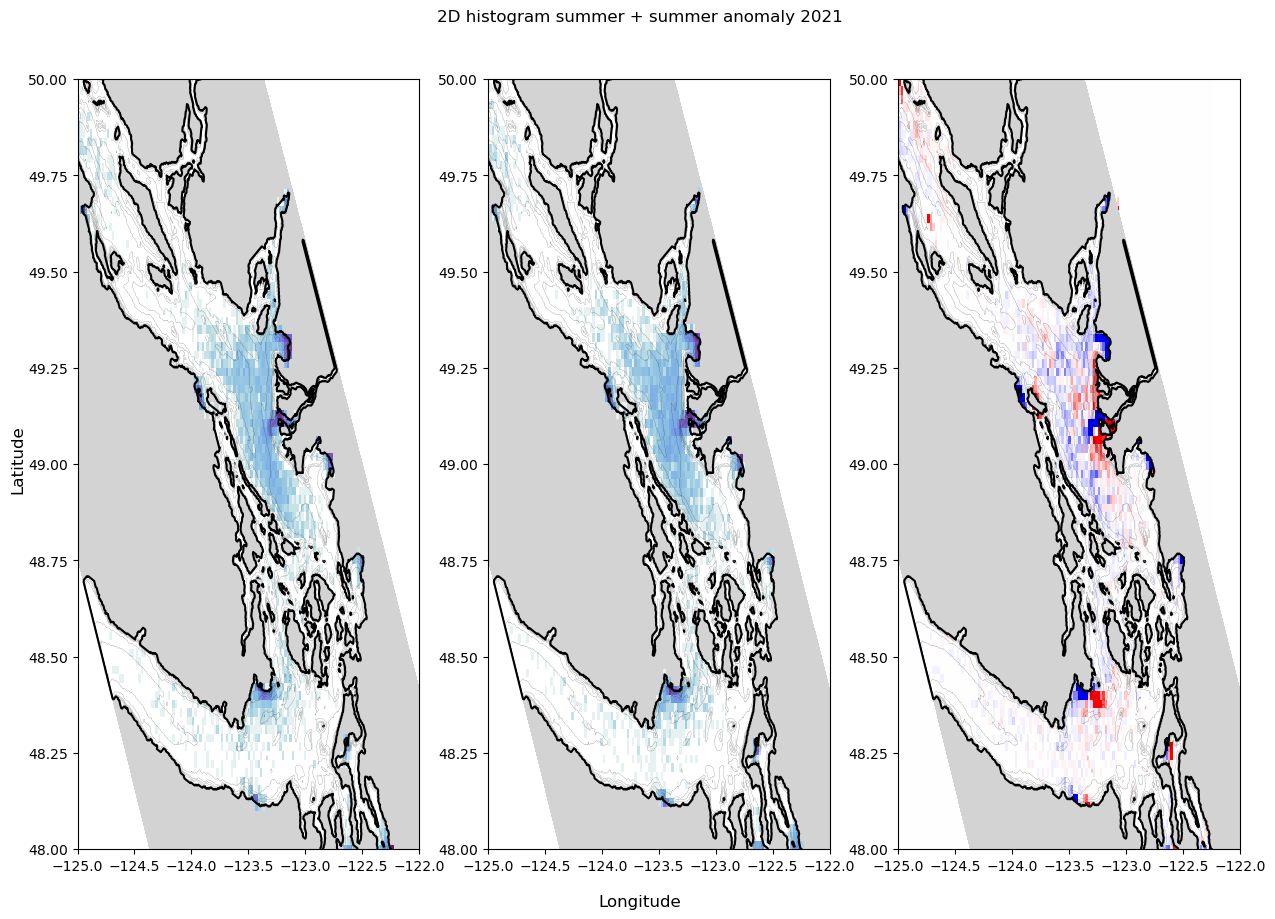

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
cm = cmocean.cm.dense
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(15, 10))
ax1.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax1.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax1.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

ax2.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax2.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax2.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

ax3.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax3.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=2)
ax3.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=3)

h, xedges, yedges, image = ax1.hist2d(Collon3,Collat3,150,norm = colors.LogNorm(), cmap =cm)
ax1.set_xlim([-125,-122])
ax1.set_ylim([48,50])
plt.figure(2)
h1, xedges1, yedges1, image1 = ax2.hist2d(Collon4,Collat4,150,norm = colors.LogNorm(), cmap =cm)
ax2.set_xlim([-125,-122])
ax2.set_ylim([48,50])
plt.figure(3)
aa=ax3.pcolormesh(xedges, yedges, ((h1-(h1+h)/2)).T,vmin=-10,vmax =10, cmap ='bwr',zorder = 1)
#cb2=fig.colorbar(aa,ax=ax3,pad=0.1,fraction=0.06)
ax3.set_xlim([-125,-122])
ax3.set_ylim([48,50])

fig.suptitle(f'2D histogram summer + summer anomaly 2021',y=0.95,x=0.5)
fig.supxlabel('Longitude',x=0.5,y=0.05)
fig.supylabel('Latitude',x=0.08)
plt.savefig("/home/jvalenti/MOAD/summerdiff.pdf")

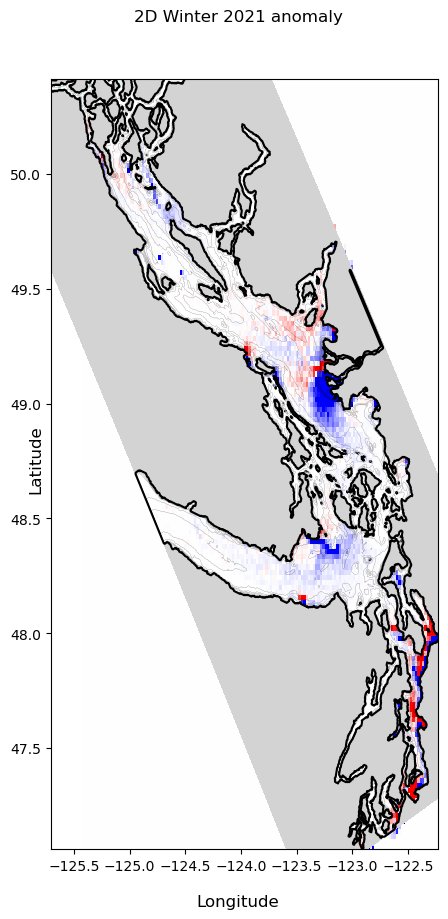

In [10]:
fig, ax = plt.subplots(1,1,figsize=(5, 10))


ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=2)
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=3)

h, xedges, yedges, image = ax.hist2d(Collon1,Collat1,150,norm = colors.LogNorm(), cmap =cm)
ax1.set_xlim([-125,-122])
ax1.set_ylim([48,50])

h1, xedges1, yedges1, image1 = ax.hist2d(Collon2,Collat2,150,norm = colors.LogNorm(), cmap =cm)
ax2.set_xlim([-125,-122])
ax2.set_ylim([48,50])

h2, xedges, yedges, image = ax.hist2d(Collon3,Collat3,150,norm = colors.LogNorm(), cmap =cm)
ax1.set_xlim([-125,-122])
ax1.set_ylim([48,50])

h3, xedges1, yedges1, image1 = ax.hist2d(Collon4,Collat4,150,norm = colors.LogNorm(), cmap =cm)
ax2.set_xlim([-125,-122])
ax2.set_ylim([48,50])

aa=ax.pcolormesh(xedges, yedges, (((h1))-((h+h1+h2+h3)/4)).T,vmin=-20,vmax =20, cmap ='bwr',zorder = 1)
#cb2=fig.colorbar(aa,ax=ax3,pad=0.1,fraction=0.06)
ax3.set_xlim([-125,-122])
ax3.set_ylim([48,50])

fig.suptitle(f'2D Winter 2021 anomaly',y=0.95,x=0.5)
fig.supxlabel('Longitude',x=0.5,y=0.05)
fig.supylabel('Latitude',x=0.08)
plt.savefig("/home/jvalenti/MOAD/seasondiff2.pdf")

In [11]:
def order_data_bytime(data):  #Here we encapsulate everything that happens at the same time together (It is easier to animate this way) 
    '''Change to use your variables of interest'''
    DS = data.to_dataframe()
    DS=DS[DS.beached==0]
    lon = np.array(DS.sort_values(by='time').lon)
    lat = np.array(DS.sort_values(by='time').lat)
    z = np.array(DS.sort_values(by='time').z)
    age = np.array(DS.sort_values(by='time').tau)/3600
    T = np.array(DS.sort_values(by='time').time)
    time = data.time[0]
    Tint = []
    for ti in T:
        try:
            Tint.append(int(ti)) 
        except TypeError: 
            pass
            
    Tint = np.array(Tint)
    Age = []
    Z = []
    Lat = []
    Lon = []
    t = time[0]
    while int(t) < int(time[-1]): 
        Lat.append(lat[np.where(Tint==int(t))])
        Lon.append(lon[np.where(Tint==int(t))])
        Age.append(age[np.where(Tint==int(t))])
        Z.append(z[np.where(Tint==int(t))])
        t+=np.timedelta64(72, 'h')

    return Lat,Lon,Age,Z

In [12]:
Lat,Lon,Age,Z = order_data_bytime(ds1)

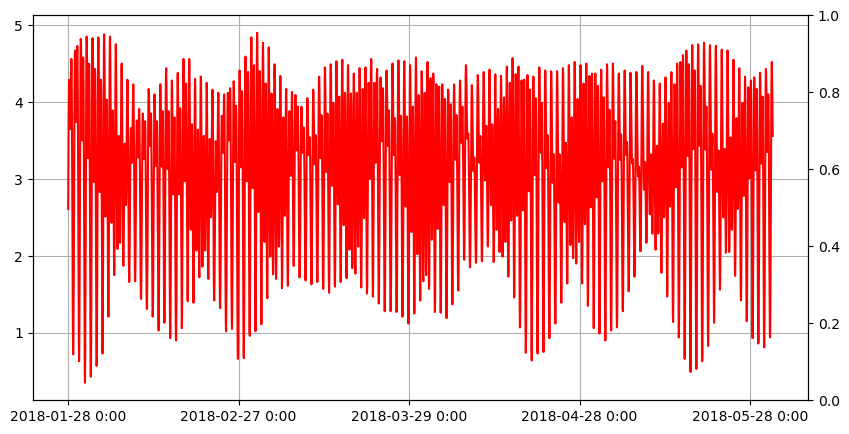

In [13]:
Point_At = pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/7795-01-JAN-2018_slev-2.csv',index_col=[0])
SLEV = np.array(Point_At['SLEV(metres)'])
Days = np.array(Point_At.index)
Time=np.linspace(0,120,28810)
fig,ax=plt.subplots(1,figsize=(10,5))

plt.grid()
ax2 = ax.twinx()
w = 1/2
ax.plot(Days[72*9:],SLEV[72*9:],'red')
ax.set_xticks(Days[72*9::720])


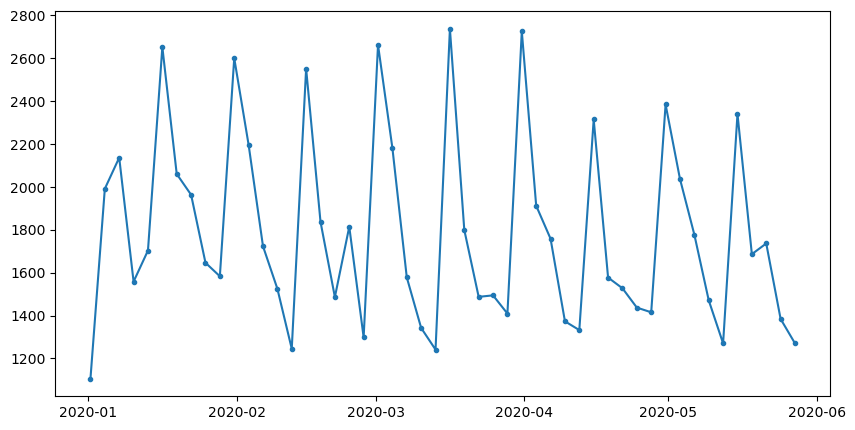

In [14]:
fig,ax=plt.subplots(1,figsize=(10,5))
cont = []
time = ds1.time[0]
for t in range(len(Lat)):
    cont.append(len(Lat[t]))

plt.plot(time[:-1],cont,'.-')

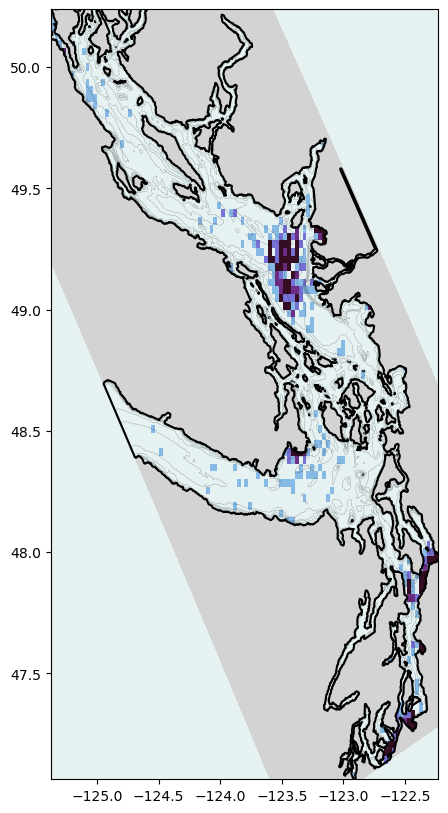

In [15]:
fig, ax = plt.subplots(1,1,figsize=(5, 10))


ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=2)
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=3)


h0, xedges, yedges, image = ax.hist2d(Lon[0],Lat[0],100, cmap =cm,vmin = 0,vmax = 4)
h = h0
for i in range(len(Lat)):
    h1, xedges, yedges, image = ax.hist2d(Lon[i],Lat[i],100, cmap =cm,vmin = 0,vmax = 4)
    h += h1
    ax1.set_xlim([-125,-122])
    ax1.set_ylim([48,50])

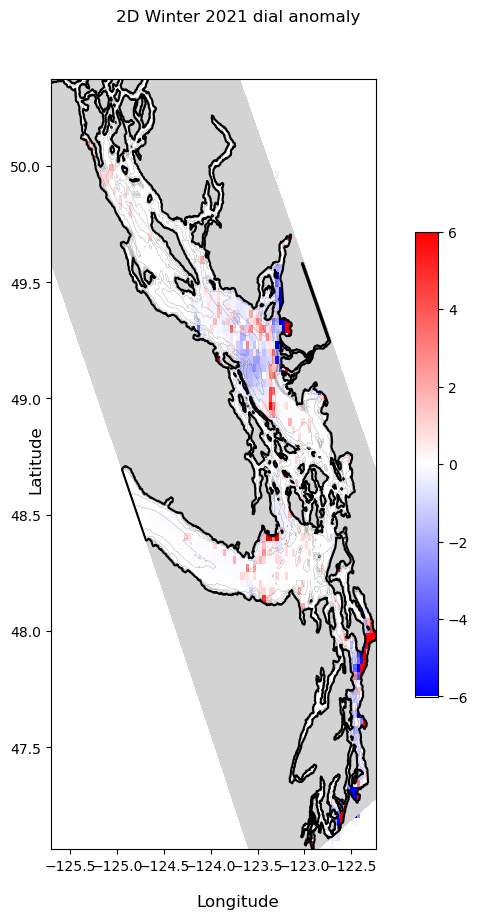

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5, 10))


ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=2)
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=3)

h0, xedges, yedges, image = ax.hist2d(Lon[10],Lat[10],100, cmap =cm,vmin = 0,vmax = 4)
aa=ax.pcolormesh(xedges, yedges, (((h0))-((h)/len(Lat))).T,vmin=-6,vmax =6, cmap ='bwr',zorder = 1)
cb2=fig.colorbar(aa,ax=ax,pad=0.1,fraction=0.06)
ax3.set_xlim([-125,-122])
ax3.set_ylim([48,50])

fig.suptitle(f'2D Winter 2021 dial anomaly',y=0.95,x=0.5)
fig.supxlabel('Longitude',x=0.5,y=0.05)
fig.supylabel('Latitude',x=0.08)
plt.savefig("/home/jvalenti/MOAD/winter2021.pdf")

In [19]:
def mapanimation(vmin,vmax,fps=1,Map=1):
    
    fig, ax = plt.subplots(1,1,figsize=(5, 10))
    ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
    ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=2)
    ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=3)
    aa = ax.pcolormesh(xedges, yedges, (h0).T,vmin=-10,vmax =10, cmap ='bwr',zorder = 1)
    fig.colorbar(aa,ax=ax,pad=0.1,fraction=0.06)
    def update(frame):
        global ss
        ax.clear()
        ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
        ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=2)
        ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=3)

        t = ax.text(0.02, 0.02, '', color='black', 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=1'), transform=ax.transAxes)
        tstamp = time[frame].values.astype('datetime64[s]').astype(datetime)
        t.set_text(tstamp.strftime('%Y-%b-%d %H:%M'))
        h0, xedges, yedges, image = ax.hist2d(Lon[frame],Lat[frame],100, cmap =cm,vmin = 0,vmax = 5)
        aa=ax.pcolormesh(xedges, yedges, (((h0))-((h)/len(Lat))).T,vmin=-10,vmax =10, cmap ='bwr',zorder = 1)
        ax.set_xlim([-125,-122])
        ax.set_ylim([48,50])   
    return animation.FuncAnimation(fig, update, frames=np.arange(0,len(time[:-1]),fps))

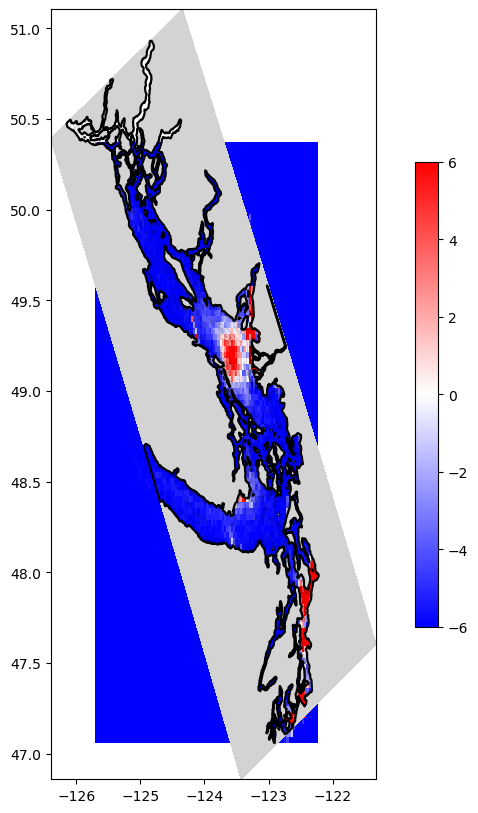

In [27]:
fig, ax = plt.subplots(1,1,figsize=(5, 10))
ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',zorder=2)
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',zorder=3)
ax.pcolormesh(xedges, yedges, (h).T,vmin=0,vmax =100, cmap ='bwr',zorder = 1)
fig.colorbar(aa,ax=ax,pad=0.1,fraction=0.06)

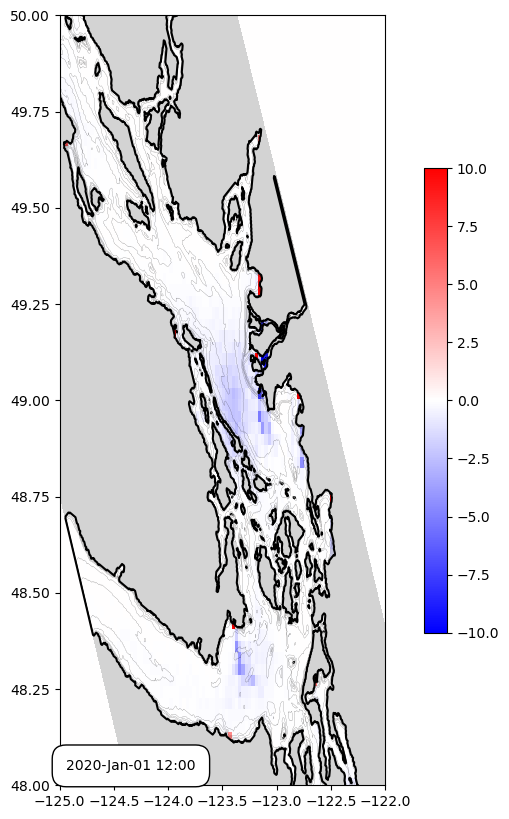

In [20]:
time = ds1.time[0]
anim = mapanimation(-20,20,1,Map=0)

f2 = r"/home/jvalenti/MOAD/animations/anim4.gif" 
FFwriter = animation.FFMpegWriter()
anim.save(f2, writer = FFwriter)

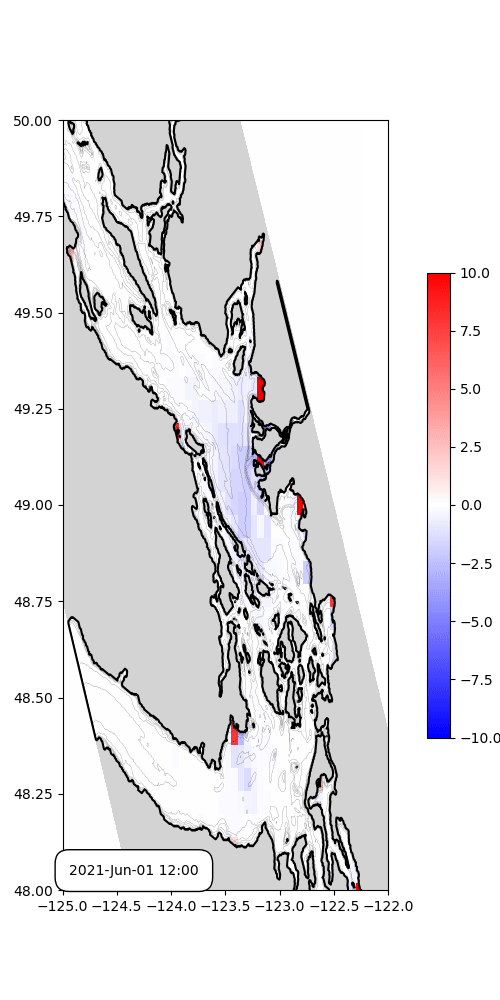

In [ ]:
with open(f2,'rb') as anim:
     display(Image(anim.read()))